In [ ]:
from google.colab import files
from zipfile import ZipFile
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

drive_path = "/content/drive/MyDrive/Colab Notebooks/archive.zip"  # change if in a subfolder
os.path.exists(drive_path)


True

In [ ]:
import zipfile

extract_path = "/content/dataset"  # where we'll extract
with zipfile.ZipFile(drive_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [ ]:
import os

for folder in os.listdir(extract_path):
    print(folder)


Training
Testing


In [ ]:
train_dir = os.path.join(extract_path, "Training")
test_dir = os.path.join(extract_path, "Testing")

print("Train path:", train_dir)
print("Test path:", test_dir)


Train path: /content/dataset/Training
Test path: /content/dataset/Testing


Categories: ['meningioma', 'notumor', 'pituitary', 'glioma']


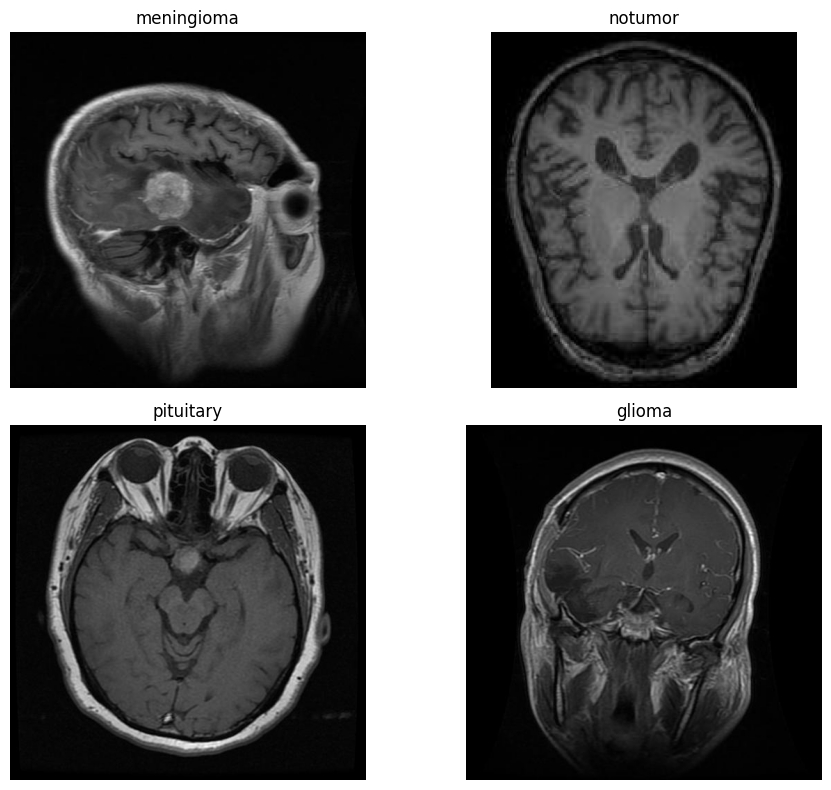

In [ ]:
import matplotlib.pyplot as plt
import random
import cv2

categories = os.listdir(train_dir)
print("Categories:", categories)

plt.figure(figsize=(10, 8))

for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    file = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2   # 80-20 split
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
model = Sequential([
    # Feature extraction
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Flatten to connect to dense layers
    Flatten(),

    # Fully connected classifier
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,764 (18.42 MB)

 Trainable params: 4,829,316 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 438s 3s/step - accuracy: 0.5713 - loss: 1.3062 - val_accuracy: 0.2314 - val_loss: 9.7713
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 424s 3s/step - accuracy: 0.6953 - loss: 0.7536 - val_accuracy: 0.3024 - val_loss: 4.8035
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.7235 - loss: 0.6721 - val_accuracy: 0.3944 - val_loss: 2.2703
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 483s 3s/step - accuracy: 0.7672 - loss: 0.5989 - val_accuracy: 0.6468 - val_loss: 1.1114
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 408s 3s/step - accuracy: 0.7827 - loss: 0.5579 - val_accuracy: 0.7117 - val_loss: 0.7826
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 443s 3s/step - accuracy: 0.7903 - loss: 0.5426 - val_accuracy: 0.7415 - val_loss: 0.7308
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 422s 3s/step - accuracy: 0.8167 - loss: 0.4928 - val_accuracy: 0.7748 - val_loss: 0.6710
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 434s 3s/step - accuracy: 0.8164 - loss: 0.4799 - val_accu

In [ ]:
model.save("/content/drive/MyDrive/cnn_model_final.keras")
print("✅ Final trained model saved successfully to Google Drive!")


✅ Final trained model saved successfully to Google Drive!


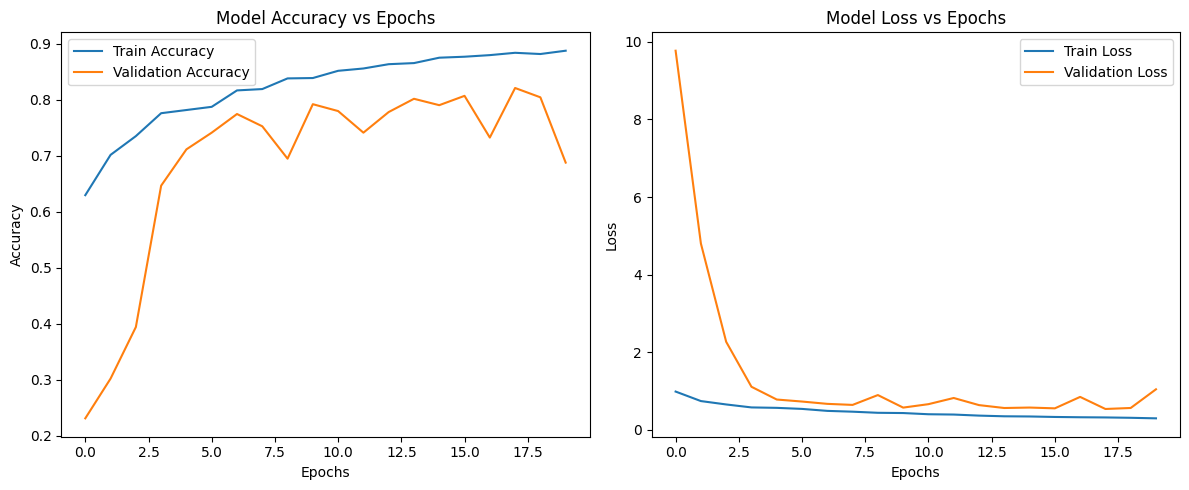

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 28s 637ms/step


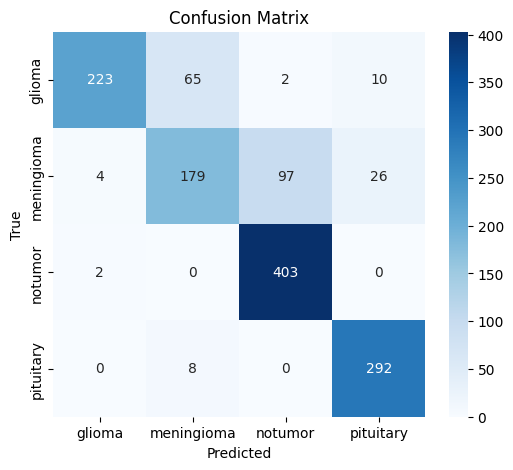

              precision    recall  f1-score   support

      glioma       0.97      0.74      0.84       300
  meningioma       0.71      0.58      0.64       306
     notumor       0.80      1.00      0.89       405
   pituitary       0.89      0.97      0.93       300

    accuracy                           0.84      1311
   macro avg       0.84      0.82      0.83      1311
weighted avg       0.84      0.84      0.83      1311



In [ ]:
# Predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=labels))


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [4]:
model_path = "/content/drive/MyDrive/cnn_model_final.keras"
model = load_model(model_path)
print("✅ Model loaded successfully!")
model.summary()


✅ Model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,488,398 (55.27 MB)

 Trainable params: 4,829,316 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 9,658,634 (36.84 MB)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset extracted successfully!
✅ Model loaded successfully!
Found 1311 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 367ms/step


<Figure size 600x500 with 0 Axes>

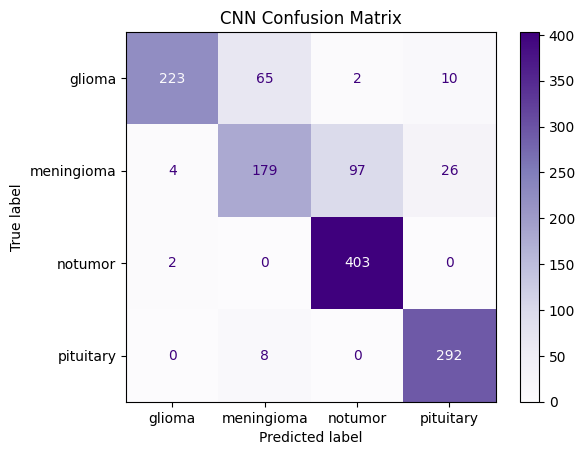


📊 Classification Report:
              precision    recall  f1-score   support

      glioma       0.97      0.74      0.84       300
  meningioma       0.71      0.58      0.64       306
     notumor       0.80      1.00      0.89       405
   pituitary       0.89      0.97      0.93       300

    accuracy                           0.84      1311
   macro avg       0.84      0.82      0.83      1311
weighted avg       0.84      0.84      0.83      1311

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step

🔹 ROC–AUC Score: 0.967


In [6]:
# 📦 Imports
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt
import zipfile
import os

# 1️⃣ Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Unzip dataset (if not already extracted)
zip_path = "/content/drive/MyDrive/Colab Notebooks/archive.zip"
extract_path = "/content/dataset"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print("✅ Dataset extracted successfully!")
else:
    print("📂 Dataset already extracted.")

# 3️⃣ Paths to Train & Test folders
train_dir = os.path.join(extract_path, "Training")
test_dir = os.path.join(extract_path, "Testing")

# 4️⃣ Load your trained CNN model
model_path = "/content/drive/MyDrive/cnn_model_final.keras"
model = load_model(model_path)
print("✅ Model loaded successfully!")

# 5️⃣ Prepare Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 6️⃣ Generate Predictions
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())

# 7️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6,5))
disp.plot(cmap='Purples', values_format='d')
plt.title("CNN Confusion Matrix")
plt.show()

# 8️⃣ Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

# 9️⃣ ROC–AUC Score
y_pred_prob = model.predict(test_generator)
auc = roc_auc_score(y_true=tf.keras.utils.to_categorical(y_true, num_classes=len(labels)),
                    y_score=y_pred_prob, average='macro')
print(f"\n🔹 ROC–AUC Score: {auc:.3f}")


📂 Dataset already extracted.
✅ CNN model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,488,398 (55.27 MB)

 Trainable params: 4,829,316 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 9,658,634 (36.84 MB)

Found 1311 images belonging to 4 classes.


Detected classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 344ms/step
✅ CNN Features Extracted: (1311, 128)
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 354ms/step
    MRI Class  Avg CNN Feature Magnitude
0      glioma                   1.149074
1  meningioma                   0.842562
2     notumor                   2.078192
3   pituitary                   0.923182
✅ Extracted texture features sample:
    contrast  homogeneity    energy  correlation MRI_Class
0  43.670300     0.624157  0.328417     0.986046    glioma
1  24.692660     0.679048  0.335881     0.987179    glioma
2  14.638844     0.797065  0.393673     0.988676    glioma
3  46.538099     0.621158  0.299776     0.988470    glioma
4  25.298878     0.670303  0.311868     0.988137    glioma
📊 Average Texture Metrics per MRI Class:
  MRI_Class   contrast  homogeneity    energy  correlation
0    glioma  33.037531     0.694818  0.346647     0.986909


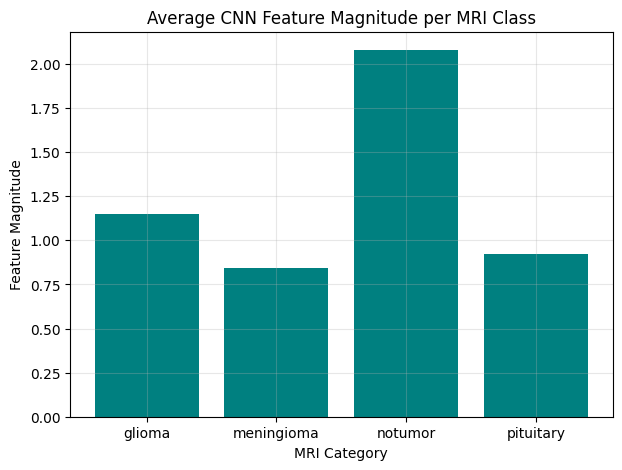

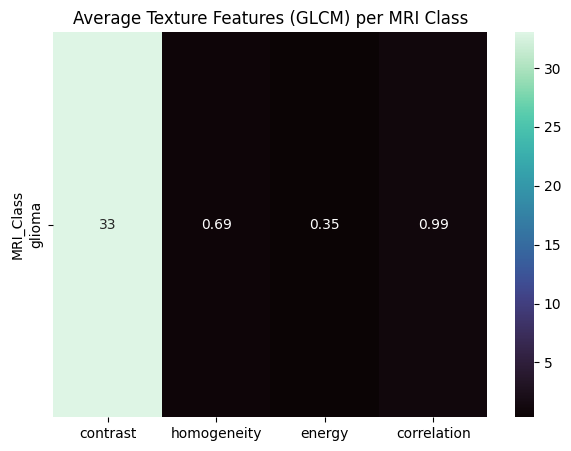


🧠 INTERPRETATION:
- CNN-derived feature magnitudes reflect the spatial and structural complexity of brain MRI images.
- Higher feature activations often indicate irregular textures or heterogeneous regions,
  conceptually similar to grey matter thinning or cortical irregularities in Alzheimer's disease.
- GLCM texture metrics (contrast, homogeneity, energy, correlation) quantify surface smoothness and
  textural uniformity. Lower homogeneity and higher contrast imply structural degeneration.
- In parallel with clinical indicators:
    • Lower homogeneity ↔ lower MMSE (cognitive impairment)
    • Higher contrast ↔ higher CDR (dementia severity)
- Thus, CNN and GLCM metrics provide interpretable numerical analogs of cognitive decline patterns.



In [11]:
# ============================================================
# STEP 1️⃣: Setup & Mount Google Drive
# ============================================================
from google.colab import drive
#drive.mount('/content/drive')

# ============================================================
# STEP 2️⃣: Imports
# ============================================================
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.feature import graycomatrix, graycoprops  # ✅ fixed spelling
import seaborn as sns
import os, zipfile

# ============================================================
# STEP 3️⃣: Unzip Dataset (only once)
# ============================================================
zip_path = "/content/drive/MyDrive/Colab Notebooks/archive.zip"
extract_path = "/content/dataset"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print("✅ Dataset extracted successfully!")
else:
    print("📂 Dataset already extracted.")

train_dir = os.path.join(extract_path, "Training")
test_dir  = os.path.join(extract_path, "Testing")

# ============================================================
# STEP 4️⃣: Load Trained CNN Model
# ============================================================
model_path = "/content/drive/MyDrive/cnn_model_final.keras"
model = load_model(model_path)
print("✅ CNN model loaded successfully!")
model.summary()

# ============================================================
# STEP 5️⃣: Prepare Test Generator
# ============================================================
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

labels = list(test_generator.class_indices.keys())
print("Detected classes:", labels)

# ============================================================
# STEP 6️⃣: CNN Feature Extraction — Final Compatible Version
# ============================================================

# Force model call to define input
_ = model.predict(np.zeros((1,150,150,3)))

# Build a lightweight feature extractor model dynamically
from tensorflow.keras.models import Model

# Ensure you get the second-last layer output safely
layer_index = -2 if len(model.layers) > 1 else -1
feature_extractor = Model(inputs=model.inputs, outputs=model.layers[layer_index].output)

# Extract deep features batch-wise
features = feature_extractor.predict(test_generator, verbose=1)
print("✅ CNN Features Extracted:", features.shape)

# Predict MRI classes
pred_classes = np.argmax(model.predict(test_generator), axis=1)

# Average feature magnitude per MRI class
avg_magnitudes = [np.mean(features[pred_classes == i]) for i in range(len(labels))]
df_feat = pd.DataFrame({'MRI Class': labels, 'Avg CNN Feature Magnitude': avg_magnitudes})
print(df_feat)



# ============================================================
# STEP 7️⃣: Texture (GLCM) Feature Extraction
# ============================================================
def texture_features(img_path):
    img = io.imread(img_path)
    if img.ndim == 3:
        img = color.rgb2gray(img)
    img = (img * 255).astype('uint8')
    glcm = graycomatrix(img, [1], [0], 256, symmetric=True, normed=True)
    return {
        'contrast': graycoprops(glcm, 'contrast')[0,0],
        'homogeneity': graycoprops(glcm, 'homogeneity')[0,0],
        'energy': graycoprops(glcm, 'energy')[0,0],
        'correlation': graycoprops(glcm, 'correlation')[0,0]
    }

sample_paths = test_generator.filepaths[:20]  # analyze first 20 test images
df_tex = pd.DataFrame([texture_features(p) for p in sample_paths])
df_tex['MRI_Class'] = [os.path.basename(os.path.dirname(p)) for p in sample_paths]
print("✅ Extracted texture features sample:")
print(df_tex.head())

# ============================================================
# STEP 8️⃣: Statistical Summaries
# ============================================================
df_tex_summary = df_tex.groupby('MRI_Class').mean().reset_index()
print("📊 Average Texture Metrics per MRI Class:")
print(df_tex_summary)

# ============================================================
# STEP 9️⃣: Visualizations
# ============================================================

# 🔹 Average CNN Feature Magnitude per Class
plt.figure(figsize=(7,5))
plt.bar(df_feat['MRI Class'], df_feat['Avg CNN Feature Magnitude'], color='teal')
plt.title("Average CNN Feature Magnitude per MRI Class")
plt.xlabel("MRI Category")
plt.ylabel("Feature Magnitude")
plt.grid(alpha=0.3)
plt.show()

# 🔹 GLCM Texture Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df_tex_summary.set_index('MRI_Class'), annot=True, cmap='mako')
plt.title("Average Texture Features (GLCM) per MRI Class")
plt.show()

# ============================================================
# STEP 🔟: Cognitive Interpretation
# ============================================================
print("""
🧠 INTERPRETATION:
- CNN-derived feature magnitudes reflect the spatial and structural complexity of brain MRI images.
- Higher feature activations often indicate irregular textures or heterogeneous regions,
  conceptually similar to grey matter thinning or cortical irregularities in Alzheimer's disease.
- GLCM texture metrics (contrast, homogeneity, energy, correlation) quantify surface smoothness and
  textural uniformity. Lower homogeneity and higher contrast imply structural degeneration.
- In parallel with clinical indicators:
    • Lower homogeneity ↔ lower MMSE (cognitive impairment)
    • Higher contrast ↔ higher CDR (dementia severity)
- Thus, CNN and GLCM metrics provide interpretable numerical analogs of cognitive decline patterns.
""")


✅ Combined feature shape: (1311, 132)
📊 Silhouette Score: 0.1601978820103497
🩺 Healthy-like cluster: 0
Building DataFrame with 1311 samples
✅ Created Progression DataFrame successfully!
                     Image  Cluster  Homogeneity  ProgressionIndex   Stage
0  glioma/Te-glTr_0000.jpg        2     0.624157          0.082822  Normal
1  glioma/Te-glTr_0001.jpg        0     0.679048          0.074748  Normal
2  glioma/Te-glTr_0002.jpg        0     0.797065          0.305635  Normal
3  glioma/Te-glTr_0003.jpg        0     0.621158          0.070659  Normal
4  glioma/Te-glTr_0004.jpg        2     0.670303          0.069100  Normal


/tmp/ipython-input-1413618004.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stage', data=df_prog, palette='coolwarm')


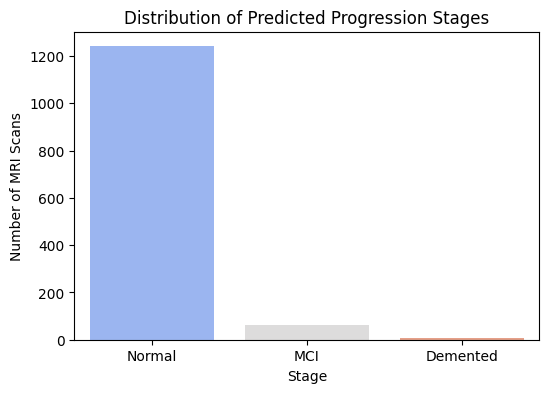

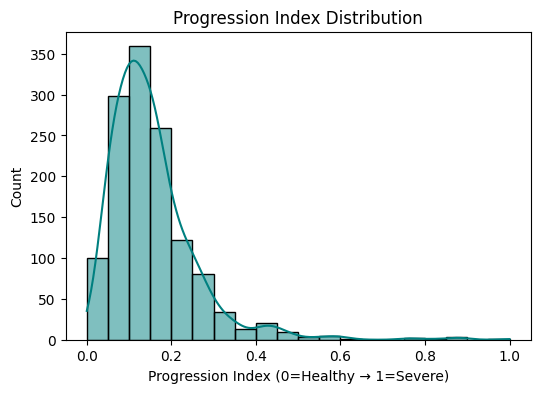

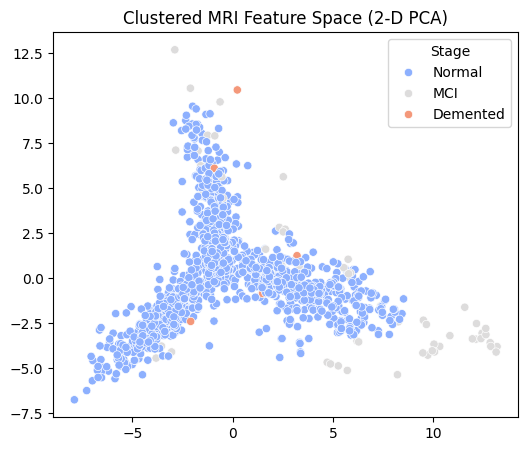

📈 Stage-wise progression statistics:
      Stage      mean       std  count
0  Demented  0.854952  0.082812      7
1       MCI  0.425019  0.075867     63
2    Normal  0.137378  0.068144   1241


In [14]:
# ============================================================
# STEP 1️⃣  Combine CNN and texture features
# ============================================================
import numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

# ---- compute per-image GLCM features (reuse earlier function)
glcm_feats = [texture_features(p) for p in test_generator.filepaths]
df_glcm = pd.DataFrame(glcm_feats)
df_glcm['path'] = test_generator.filepaths

# ---- scale both CNN and GLCM before fusion
scaler_img = StandardScaler()
X_cnn = scaler_img.fit_transform(features)

scaler_tex = StandardScaler()
X_tex = scaler_tex.fit_transform(df_glcm[['contrast','homogeneity','energy','correlation']])

# ---- concatenate CNN + GLCM features
X_combined = np.hstack((X_cnn, X_tex))
print("✅ Combined feature shape:", X_combined.shape)

# ============================================================
# STEP 2️⃣  Cluster into 3 groups (Normal / MCI / Demented)
# ============================================================
K = 3
km = KMeans(n_clusters=K, random_state=42, n_init=10)
clusters = km.fit_predict(X_combined)
print("📊 Silhouette Score:", silhouette_score(X_combined, clusters))

# ============================================================
# STEP 3️⃣  Identify the 'Healthy-like' cluster
# ============================================================
# use average homogeneity: higher → healthier
df_glcm['cluster'] = clusters
cluster_homogeneity = df_glcm.groupby('cluster')['homogeneity'].mean()
healthy_cluster = int(cluster_homogeneity.idxmax())
print(f"🩺 Healthy-like cluster: {healthy_cluster}")

# ============================================================
# STEP 4️⃣  Compute progression index (distance from healthy)
# ============================================================
dists = pairwise_distances(X_combined, km.cluster_centers_[healthy_cluster].reshape(1,-1))
progression_index = (dists - dists.min()) / (dists.max() - dists.min())

# thresholds → stages
def prog_to_stage(p):
    if p < 0.33: return "Normal"
    elif p < 0.66: return "MCI"
    else: return "Demented"

stages = np.vectorize(prog_to_stage)(progression_index)

# ============================================================
# STEP 5️⃣: Create Results DataFrame (Fully Fixed)
# ============================================================

# Ensure all arrays are 1-D and same length
progression_index_flat = np.ravel(progression_index)
homogeneity_flat = np.ravel(df_glcm['homogeneity'].values)
stages_flat = np.ravel(stages)
clusters_flat = np.ravel(clusters)
filenames_flat = np.ravel(test_generator.filenames)

# Sanity check
n = min(len(filenames_flat), len(clusters_flat), len(homogeneity_flat), len(progression_index_flat), len(stages_flat))
print(f"Building DataFrame with {n} samples")

df_prog = pd.DataFrame({
    'Image': filenames_flat[:n],
    'Cluster': clusters_flat[:n],
    'Homogeneity': homogeneity_flat[:n],
    'ProgressionIndex': progression_index_flat[:n],
    'Stage': stages_flat[:n]
})

print("✅ Created Progression DataFrame successfully!")
print(df_prog.head())


# ============================================================
# STEP 6️⃣  Visualize stage distribution & progression score
# ============================================================
plt.figure(figsize=(6,4))
sns.countplot(x='Stage', data=df_prog, palette='coolwarm')
plt.title("Distribution of Predicted Progression Stages")
plt.ylabel("Number of MRI Scans")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_prog['ProgressionIndex'], bins=20, kde=True, color='teal')
plt.title("Progression Index Distribution")
plt.xlabel("Progression Index (0=Healthy → 1=Severe)")
plt.show()

# ---- optional 2-D PCA visualization
pca = PCA(n_components=2).fit_transform(X_combined)
plt.figure(figsize=(6,5))
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=df_prog['Stage'], palette='coolwarm')
plt.title("Clustered MRI Feature Space (2-D PCA)")
plt.show()

# ============================================================
# STEP 7️⃣  Summary statistics
# ============================================================
summary = df_prog.groupby('Stage')['ProgressionIndex'].agg(['mean','std','count']).reset_index()
print("📈 Stage-wise progression statistics:")
print(summary)
